In [1]:
from pathlib import Path

from dynamic_fusion.utils.dataset import CocoTestDataset

dataset_path = Path('..', 'data', 'interim', 'coco', 'train', '2subbins')


metrics_temporal_scale = []
spatial_scale = 1
temporal_scale = 1
dataset = CocoTestDataset(dataset_path, (spatial_scale, spatial_scale), threshold=1.35)
dataset.get_metadata(0)

from dynamic_fusion.utils.video import get_video


epss,_,_,counts,downscaled_epss,_,_,_,preprocessed_image, transforms = dataset[6]
video = get_video(preprocessed_image, transforms, [0, 0.04, 0.09, 0.19], False, True)


In [2]:
events = dataset.load_events(6, downscaled=True, include_threshold=False)

events.timestamp /= 20

In [3]:
events.shape

(4195119, 4)

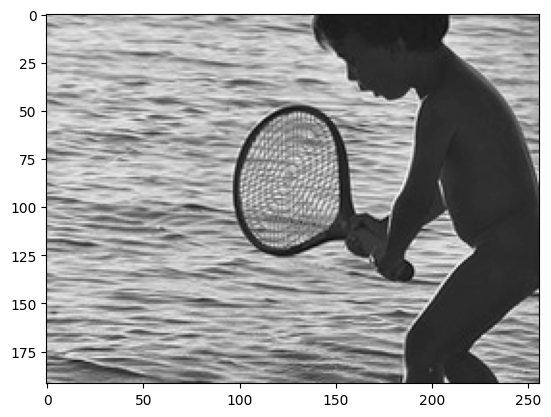

In [46]:
from matplotlib import pyplot as plt

epss,_,_,counts,downscaled_epss,_,_,_,preprocessed_image, transforms = dataset[6]

video = get_video(preprocessed_image, transforms, [0, 0.01, 0.1], False, True)
plt.imshow(video[1].cpu(), cmap='gray')

In [14]:
del pl

In [27]:
import pyvista as pv
import numpy as np

import vtk
pv.set_jupyter_backend('trame')

T_max = 0.1
sample = events[events.timestamp < T_max]

sample = sample.sample(20000)
points = np.array([sample.x, sample.timestamp, sample.y], dtype=float)
points.shape

pv.global_theme.font.label_size=50
pl = pv.Plotter()

points[0] /= points[0].max()
points[0] = (points[0] - 0.5)*2
points[1] /= points[1].max()
points[1] = (points[1] - 0.5)*2
points[2] /= points[2].max()
points[2] = (points[2] - 0.5)*2

pl.add_points(points.T, scalars = sample.polarity, point_size = 2, show_scalar_bar = False, cmap=['red', 'blue'])
pl.show()
# SCALE = 1
# pl.set_scale(xscale = 1 / points[0].max()*SCALE, yscale = 1 / points[1].max()*SCALE, zscale = 1 / points[2].max()*SCALE)

pl.show_bounds(grid='back',
               axes_ranges=[-1, 1, -1, 1, -1, 1],
    location='outer',
    bold=True,
    xtitle = 'X',
    ytitle = 'Y',
    font_size=40,
    ztitle = 'Time',
    use_3d_text = False,
    render=True
)

pl.camera_position = [(-5.490940237577687, 2.587770052631477, 2.7923181337281493),
 (-0.038744119229075946, -0.12698559912331622, 0.019545346578325296),
 (0.4144128869356608, 0.9071340055739536, -0.07327929498163532)]

pl.screenshot('../liif3d_2_events.png', window_size=[720, 640])


Widget(value='<iframe src="http://localhost:39285/index.html?ui=P_0x7b7ad8be7f70_17&reconnect=auto" class="pyv…

pyvista_ndarray([[[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 ...,

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
  

In [15]:
colored_event_polarity_sums.shape

(100, 106, 160, 3)

(100, 106, 160, 3)

In [26]:
from dynamic_fusion.utils.array import to_numpy
from dynamic_fusion.utils.visualization import create_red_blue_cmap, img_to_colormap


colored_event_polarity_sums = img_to_colormap(to_numpy(downscaled_epss.sum(dim=1)), create_red_blue_cmap(501))*255


plane1 = pv.Plane(i_size=2, j_size=2, i_resolution=colored_event_polarity_sums.shape[2] - 1, j_resolution=colored_event_polarity_sums.shape[1] - 1, center = (0,0,-1))
plane2 = pv.Plane(i_size=2, j_size=2, i_resolution=colored_event_polarity_sums.shape[2] - 1, j_resolution=colored_event_polarity_sums.shape[1] - 1, center = (0,0,0.))
plane3 = pv.Plane(i_size=2, j_size=2, i_resolution=colored_event_polarity_sums.shape[2] - 1, j_resolution=colored_event_polarity_sums.shape[1] - 1, center = (0,0,1))


texture1 = pv.numpy_to_texture(colored_event_polarity_sums[0])
texture2 = pv.numpy_to_texture(colored_event_polarity_sums[9])
texture3 = pv.numpy_to_texture(colored_event_polarity_sums[19])

pl = pv.Plotter()
# add invisible points at [0,0,-1] and [0,0,1]
pl.add_points(np.array([[-1,-1,-1], [1,1,1]]), color='black', point_size=0.1)

pl.add_mesh(plane1, texture=texture1, show_edges=False, lighting=False)
pl.add_mesh(plane2, texture=texture2, show_edges=False, lighting=False)
pl.add_mesh(plane3, texture=texture3, show_edges=False, lighting=False)

pl.show()
pl.disable_shadows()
pl.camera_position = [(-5.490940237577687, 2.587770052631477, 2.7923181337281493),
 (-0.038744119229075946, -0.12698559912331622, 0.019545346578325296),
 (0.4144128869356608, 0.9071340055739536, -0.07327929498163532)]


pl.show_bounds(grid='back',
    location='outer',
    bold=True,
    xtitle = 'X',
    ytitle = 'Y',
    font_size=40,
    ztitle = 'Time',
    use_3d_text = False,
    render=True
)

pl.screenshot('../liif3d_2_discretized.png', window_size=[720, 640])


/home/davton/miniconda3/envs/thesis/lib/python3.9/site-packages/pyvista/plotting/texture.py:675: UserWarning: Expected `image` dtype to be ``np.uint8``. `image` has been copied and converted to np.uint8.
  warnings.warn(
/home/davton/miniconda3/envs/thesis/lib/python3.9/site-packages/pyvista/core/utilities/points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:39285/index.html?ui=P_0x7b7ad8b5ab80_16&reconnect=auto" class="pyv…

pyvista_ndarray([[[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 ...,

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
  

In [ ]:
pl.camera_position


In [25]:
feature_points = set()
for x in [-1, 0, 1]:
    for y in [-1, 0, 1]:
        for z in [-1, 0, 1]:
            feature_points.add((x, y, z))

grid_lines = []
for x_0, y_0, z_0 in feature_points:
    for x_1, y_1, z_1 in feature_points:
        if (x_1 == x_0 and y_1 == y_0):
            grid_lines.append(((x_0, y_0, z_0), (x_1, y_1, z_1)))
        if (x_1 == x_0 and z_1 == z_0):
            grid_lines.append(((x_0, y_0, z_0), (x_1, y_1, z_1)))
        if (z_1 == z_0 and y_1 == y_0):
            grid_lines.append(((x_0, y_0, z_0), (x_1, y_1, z_1)))

    
feature_points = np.array(list(feature_points))
pl = pv.Plotter()
pl.add_points(np.array([[-1,-1,-1], [1,1,1]]), color='black', point_size=0.1)
pl.add_points(feature_points, color='blue',  render_points_as_spheres=True, point_size=20.0)
pl.show_bounds(grid='back',
    location='outer',
    bold=True,
    xtitle = 'X',
    ytitle = 'Y',
    font_size=40,
    ztitle = 'Time',
    use_3d_text = False,
    render=True
)

for start_point, end_point in grid_lines:
    line = pv.Line(start_point, end_point)
    pl.add_mesh(line, color='blue', opacity=1)


pl.camera_position = [(-5.490940237577687, 2.587770052631477, 2.7923181337281493),
 (-0.038744119229075946, -0.12698559912331622, 0.019545346578325296),
 (0.4144128869356608, 0.9071340055739536, -0.07327929498163532)]

pl.show()

pl.screenshot('../liif3d_2_features.png', window_size=[720, 640])


/home/davton/miniconda3/envs/thesis/lib/python3.9/site-packages/pyvista/core/utilities/points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:39285/index.html?ui=P_0x7b7eb8fa2760_15&reconnect=auto" class="pyv…

pyvista_ndarray([[[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 ...,

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
  

In [24]:
from dynamic_fusion.utils.array import to_numpy
from dynamic_fusion.utils.visualization import create_red_blue_cmap, img_to_colormap
import pyvista as pv
import numpy as np
import torch

# colored_event_polarity_sums = img_to_colormap(to_numpy(downscaled_epss.sum(dim=1)), create_red_blue_cmap(501))*255

FRAME_TIMES = [0.01, 0.04, 0.14, 0.19]
SCALES = [0.1, 0.5, 0.25, 0.05]

video = get_video(preprocessed_image, transforms, FRAME_TIMES, False, False)
resolutions = [(int(video.shape[1]*scale), int(video.shape[2]*scale)) for scale in SCALES]

planes = []
for frame_time, res in zip(FRAME_TIMES, resolutions):
    time = (frame_time / 0.19)*2 - 1
    planes.append(pv.Plane(i_size=2, j_size=2, i_resolution=res[1] - 1, j_resolution=res[0] - 1, center = (0,0,time)))


textures = []
for i, (frame_time, resolution) in enumerate(zip(FRAME_TIMES,resolutions)):
    frame = torch.nn.functional.interpolate(video[i,None,None], resolution).squeeze()
    textures.append(pv.numpy_to_texture(frame.cpu().numpy()*255))

pl = pv.Plotter()
# add invisible points at [0,0,-1] and [0,0,1]
pl.add_points(np.array([[-1,-1,-1], [1,1,1]]), color='black', point_size=0.1)

for plane, texture in zip(planes, textures):
    pl.add_mesh(plane, texture=texture, show_edges=False, lighting=False)

pl.show()
pl.disable_shadows()
pl.camera_position = [(-5.490940237577687, 2.587770052631477, 2.7923181337281493),
 (-0.038744119229075946, -0.12698559912331622, 0.019545346578325296),
 (0.4144128869356608, 0.9071340055739536, -0.07327929498163532)]


pl.show_bounds(grid='back',
    location='outer',
    bold=True,
    xtitle = 'X',
    ytitle = 'Y',
    font_size=40,
    ztitle = 'Time',
    use_3d_text = False,
    render=True
)

pl.screenshot('../liif3d_2_output.png', window_size=[720, 640])


/home/davton/miniconda3/envs/thesis/lib/python3.9/site-packages/pyvista/plotting/texture.py:675: UserWarning: Expected `image` dtype to be ``np.uint8``. `image` has been copied and converted to np.uint8.
  warnings.warn(
/home/davton/miniconda3/envs/thesis/lib/python3.9/site-packages/pyvista/core/utilities/points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:39285/index.html?ui=P_0x7b7c081f4e80_14&reconnect=auto" class="pyv…

pyvista_ndarray([[[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 ...,

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
  

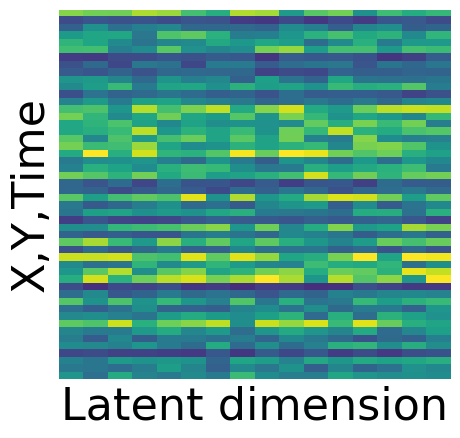

In [45]:
from matplotlib import pyplot as plt
import numpy as np

a = (np.random.rand(50, 16)/2 + 0.5)*(np.random.rand(50, 1) / 1.2 + (1.2-1))

plt.imshow(a, aspect=16/53, vmin=0, vmax=1)

ax = plt.gca()
for side in ['top','right','bottom','left']:
    ax.spines[side].set_visible(False)
ax.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False, labelleft=False)
# Set y label fontsize to same as title
ax.yaxis.label.set_size(32)
ax.xaxis.label.set_size(32)

plt.xlabel('Latent dimension')
plt.ylabel('X,Y,Time')
plt.savefig('latent_code.png', bbox_inches='tight', dpi=100)

In [16]:
video[i].shape

torch.Size([425, 640])

In [5]:
import einops
import vtk
import pyvista as pv
from PIL import Image
import numpy as np
pv.set_jupyter_backend('trame')

# Path to your image
image_path = 'interpolation.png'

# Load the image using PIL and convert it to a numpy array
image = Image.open(image_path)
image_array = np.array(image)

# Check if the image has an alpha channel and drop it if present
if image_array.shape[2] == 4:
    image_array = image_array[:, :, :3]

video_array = einops.repeat(video.cpu().numpy()*255, "T X Y -> T X Y 4")
video_array[..., -1] = 125

scale = 100

# Create a plane that matches the dimensions of the image
# The plane dimensions will be set to the image dimensions
plane = pv.Plane(i_size=2, j_size=2, i_resolution=image_array.shape[1] - 1, j_resolution=image_array.shape[0] - 1, center = (0,0,0.7))
# plane2 = pv.Plane(i_size=2, j_size=2, i_resolution=image_array.shape[1] - 1, j_resolution=image_array.shape[0] - 1, center = (0,0,0))
# plane3 = pv.Plane(i_size=2, j_size=2, i_resolution=image_array.shape[1] - 1, j_resolution=image_array.shape[0] - 1, center = (0,0,1))


# Create texture from the image array
texture1 = pv.numpy_to_texture(video_array[0])
texture2 = pv.numpy_to_texture(video_array[1])
texture3 = pv.numpy_to_texture(video_array[2])


grid_lines = []
# Generate points in all dimensions
feature_points = set()
for x in [-1, 0, 1]:
    for y in [-1, 0, 1]:
        for z in [-1, 0, 1]:
            feature_points.add((x, y, z))

for x_0, y_0, z_0 in feature_points:
    for x_1, y_1, z_1 in feature_points:
        if (x_1 == x_0 and y_1 == y_0):
            grid_lines.append(((x_0, y_0, z_0), (x_1, y_1, z_1)))
        if (x_1 == x_0 and z_1 == z_0):
            grid_lines.append(((x_0, y_0, z_0), (x_1, y_1, z_1)))
        if (z_1 == z_0 and y_1 == y_0):
            grid_lines.append(((x_0, y_0, z_0), (x_1, y_1, z_1)))


nearest_feature_points = set()
for x in [-1, 0]:
    for y in [1, 0]:
        for z in [0, 1]:
            nearest_feature_points.add((x,y,z))


candidate_line_points = []
for x in [-0.5, 0.5]:
    for y in [-0.5, 0.5]:
        for z in [-0.5, 0.5]:
            candidate_line_points.append((x,y,z))

lines = []
for x_0, y_0, z_0 in candidate_line_points:
    for x_1, y_1, z_1 in candidate_line_points:
        if (x_1 == x_0 and y_1 == y_0):
            lines.append(((x_0, y_0, z_0*2), (x_1, y_1, z_1*2)))
        if (x_1 == x_0 and z_1 == z_0):
            lines.append(((x_0, y_0*2, z_0), (x_1, y_1*2, z_1)))
        if (z_1 == z_0 and y_1 == y_0):
            lines.append(((x_0*2, y_0, z_0), (x_1*2, y_1, z_1)))



# Convert the points to a NumPy array
nearest_feature_points_np = np.array(list(nearest_feature_points), dtype='float')
other_feature_points_np = np.array(list(feature_points - nearest_feature_points), dtype='float')

real_point = np.array([-0.8, 0.2, 0.7])
nearest_point = np.array([-1,0,1])



# Create a plotter and add the plane with the texture
plotter = pv.Plotter()
# plotter.add_points(feature_points, color='blue',  render_points_as_spheres=True, point_size=10.0)
# plotter.add_points(real_points, color='black',  render_points_as_spheres=True, point_size=10.0)

nearest_feature_point_labels = []
for point in nearest_feature_points_np:
    string = f'$z^*_{{{int(point[2]):d}{int(point[1]):d}{int(point[0]+1):d}}}$'
    nearest_feature_point_labels.append(string)

plotter.add_point_labels(nearest_feature_points_np, nearest_feature_point_labels, 
                         text_color='blue', 
                         font_size=30, 
                         point_color='blue',
                         render_points_as_spheres=True, 
                         point_size=10.0,
                         always_visible=True,
                         fill_shape = False,
                         shadow=False)

plotter.add_points(other_feature_points_np, color='blue',  render_points_as_spheres=True, point_size=10.0)

plotter.add_point_labels(real_point, ["$x_q$"], 
                         text_color='black', 
                         font_size=30, 
                         point_color='black',
                         render_points_as_spheres=True, 
                         point_size=10.0,
                         always_visible=True,
                         fill_shape = False,
                         shadow=False)


real_point = np.array([-0.8, 0.2, 0.7])
nearest_point = np.array([-1,0,1])

y_projection = np.array([real_point[0], nearest_point[1], real_point[2]])
y_proj_line = pv.Line(real_point, y_projection)
plotter.add_mesh(y_proj_line, color='black', opacity=1)

x_projection = np.array([nearest_point[0], y_projection[1], y_projection[2]])
x_proj_line = pv.Line(y_projection, x_projection)
plotter.add_mesh(x_proj_line, color='black', opacity=1)

z_projection = np.array([y_projection[0], y_projection[1], nearest_point[2]])
z_proj_line = pv.Line(y_projection, z_projection)
plotter.add_mesh(z_proj_line, color='black', opacity=1)


for start_point, end_point in grid_lines:
    line = pv.Line(start_point, end_point)
    plotter.add_mesh(line, color='blue', opacity=0.1)

arrow = pv.Arrow(nearest_point, real_point - nearest_point, shaft_radius=0.015, tip_radius = 0.05, tip_length = 0.2, scale='auto')
plotter.add_mesh(arrow, color='black')

arrow_label_pos = nearest_point + (real_point - nearest_point) * 3 /4
arrow_label_pos[1] = arrow_label_pos[1] -0.2

plotter.add_point_labels(arrow_label_pos, [r"$f_{\theta}$"], 
                         text_color='black', 
                         font_size=30,
                         always_visible=True,
                         fill_shape = False,
                         show_points = False)



plotter.add_mesh(plane, texture=texture1, show_edges=False)

# plotter.disable_shadows()

plotter.camera_position = [(-7.1350363889210024, 3.168803015252341, 2.1492068833971674),
 (0.0, 0.0, 0.0),
 (0.39583541719596665, 0.9175071302789476, -0.03866507960143489)]

plotter.camera_position = [(-4.986801245739665, 1.7345828553263651, 1.6442867334747102),
 (-0.038744119229075946, -0.12698559912331622, 0.019545346578325296),
 (0.3384119219619843, 0.9398610962795867, -0.0462438187667236)]

# plotter.show(jupyter_backend='trame')
plotter.screenshot('../liif3d.png', window_size=[1024, 768])

pyvista_ndarray([[[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 ...,

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
  

In [11]:
plotter.camera_position

[(-4.986801245739665, 1.7345828553263651, 1.6442867334747102),
 (-0.038744119229075946, -0.12698559912331622, 0.019545346578325296),
 (0.3384119219619843, 0.9398610962795867, -0.0462438187667236)]